# Supervised Learning: Logistic Regression

Practicing binary classification with logistic regression, by using the titanic dataset to predict whether a passenger survived based on certain features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
train = pd.read_csv('./datasets/titanic_train.csv')
test = pd.read_csv('./datasets/titanic_test.csv')

### Exploratory Data analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

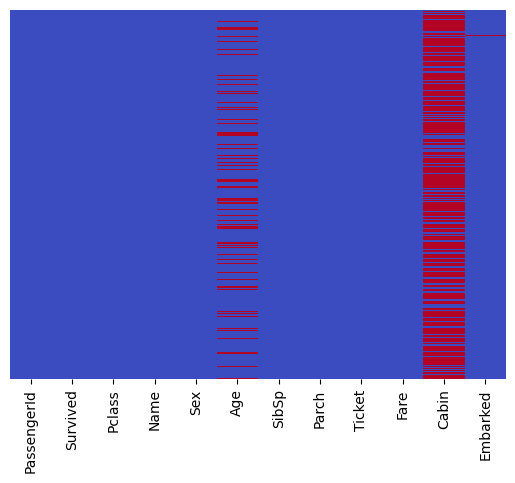

In [8]:
# This is used to check where some data is missing. It is evident that some age data is missing, A lot of cabin data is missing and maybe a row of embarked data is missing.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

<Axes: xlabel='Survived', ylabel='count'>

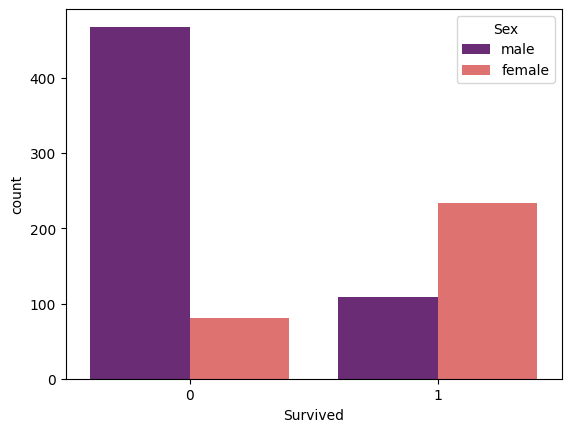

In [14]:
# Check those who survived and those that didn't based on sex. Chai, Men de suffer sha
sns.countplot(data=train, x='Survived', hue='Sex', palette='magma')

<Axes: xlabel='Survived', ylabel='count'>

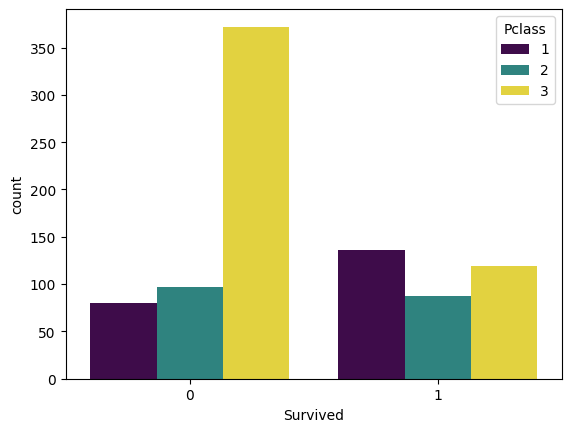

In [17]:
# Check those who survived and those that didn't based on passenger class. No mercy for the poor man o
sns.countplot(data=train, x="Survived", hue="Pclass", palette="viridis")

<Axes: xlabel='Age', ylabel='Count'>

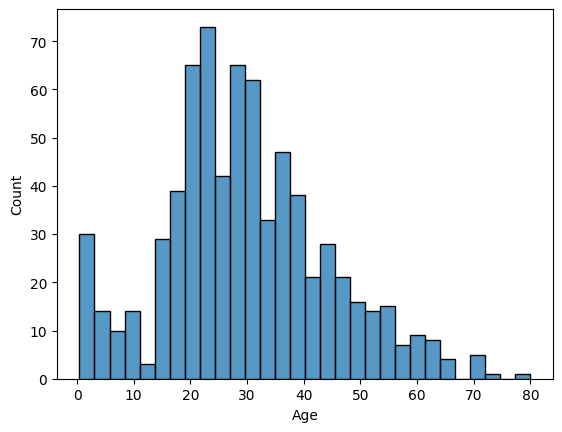

In [19]:
# To check the age distribution of passengers
sns.histplot(train['Age'].dropna(), bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

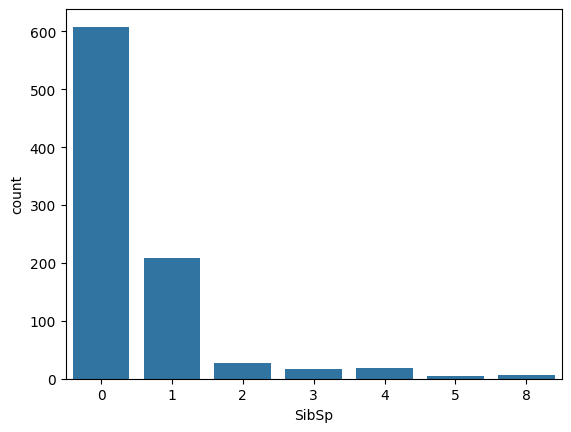

In [21]:
# Check the count of the siblings and spouses. Shows that most people did not have a sibling or spouse on board
sns.countplot(x='SibSp', data=train)

<Axes: xlabel='Fare', ylabel='Count'>

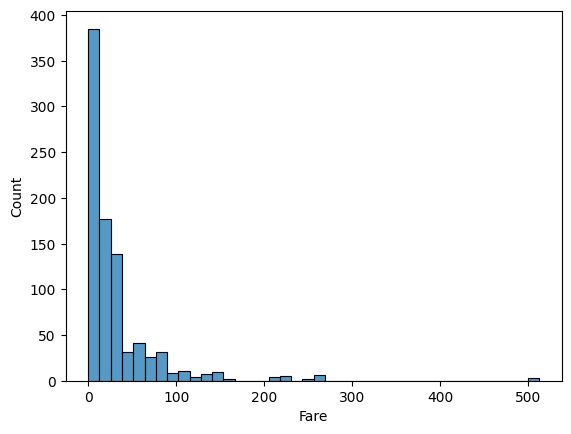

In [24]:
# Distribution of how much people paid. Shows that most fares existed b/w 0 - 100
sns.histplot(train['Fare'], bins=40)

<Axes: xlabel='Pclass', ylabel='count'>

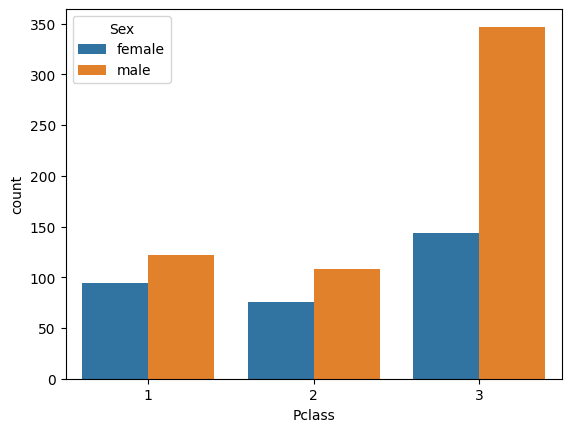

In [27]:
# Amount of people in each class and categorizing them by sex.
sns.countplot(data=train, x='Pclass', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

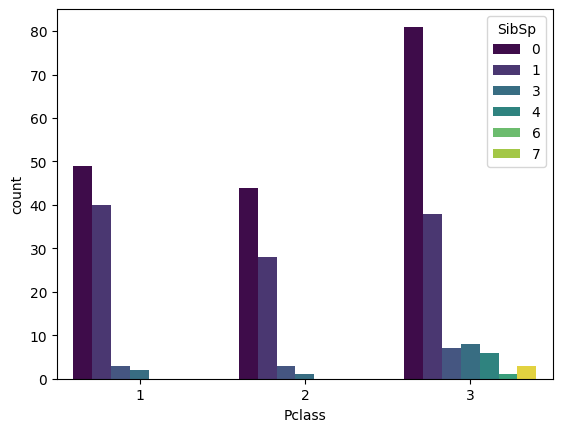

In [32]:
# Count the amount of female passengers in each class and categorize them based on the number of siblins and spouses that they have.
sns.countplot(data=train[train['Sex'] == 'female'], x='Pclass', hue='SibSp', palette='viridis')

<Axes: xlabel='Pclass', ylabel='count'>

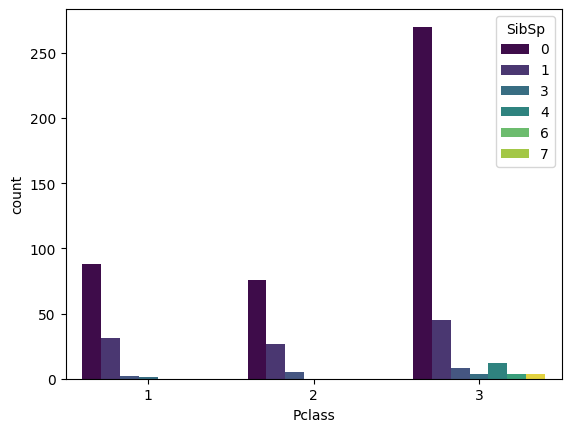

In [35]:
# Count the amount of male passengers in each class and categorize them based on the number of siblins and spouses that they have.
sns.countplot(
    data=train[train["Sex"] == "male"], x="Pclass", hue="SibSp", palette="viridis"
)

<Axes: xlabel='Pclass', ylabel='Age'>

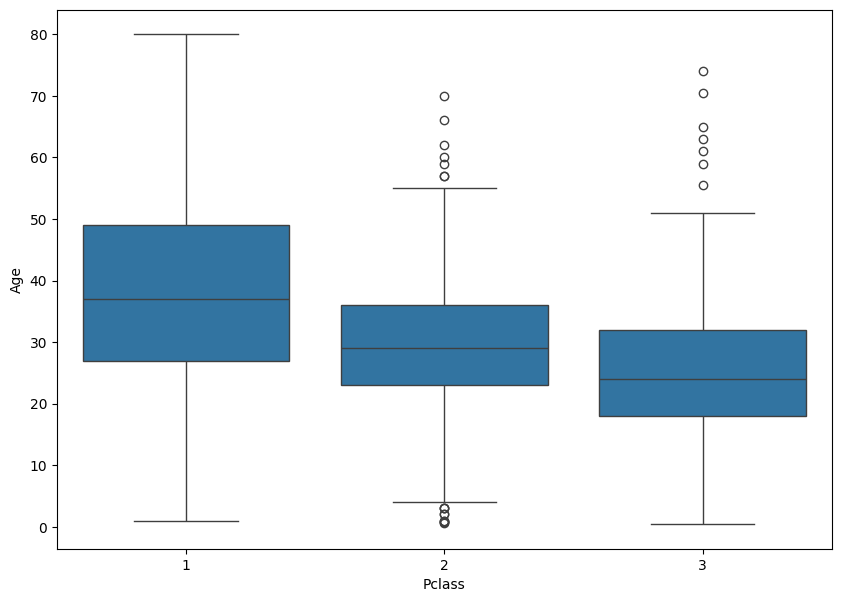

In [36]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=train, x="Pclass", y="Age")
# To Check Age distibution of passengers by the class of their ticket

### Data Cleaning to fill in missing data

For the sake of this project, we are going to be filling the data based on the average age of existing passengers that share the same class and sex.


In [42]:
# Males in first class
m1 = round(train[(train['Pclass'] == 1) & (train['Sex'] == 'male')]['Age'].mean())
m1

41

In [43]:
# Females in first class
f1 = round(train[(train["Pclass"] == 1) & (train["Sex"] == "female")]["Age"].mean())
f1

35

In [44]:
# Males in second class
m2 = round(train[(train["Pclass"] == 2) & (train["Sex"] == "male")]["Age"].mean())
m2

31

In [45]:
# Females in second class
f2 = round(train[(train["Pclass"] == 2) & (train["Sex"] == "female")]["Age"].mean())
f2

29

In [46]:
# Males in third class
m3 = round(train[(train["Pclass"] == 3) & (train["Sex"] == "male")]["Age"].mean())
m3

27

In [47]:
# Females in second class
f3 = round(train[(train["Pclass"] == 3) & (train["Sex"] == "female")]["Age"].mean())
f3

22

In [57]:
# Function to fill up the ages
def fill_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    Sex = cols['Sex']
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male':
            return m1
        elif Pclass == 1 and Sex == 'female':
            return f1
        elif Pclass == 2 and Sex == 'female':
            return f2
        elif Pclass == 2 and Sex == 'male':
            return m2
        elif Pclass == 3 and Sex == 'female':
            return f3
        else:
            return m3
    else:
        return Age

In [60]:
train['Age'] = train[['Age', 'Pclass', 'Sex']].apply(fill_age, axis=1)
train.info()
# Now there are no non null objects in the age column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
train.drop('Cabin', axis=1,inplace=True)
# To drop the entire cabin column due to excess missing data points. Mistakenly ran the cell again

KeyError: "['Cabin'] not found in axis"

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

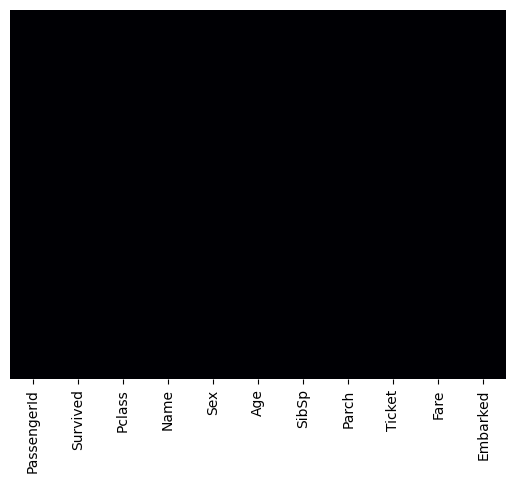

In [67]:
train.dropna(inplace=True)
# There was a missing variable in the embarked column. So that entry has to be dropped to have a clean dataset
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')
# Now, There is no missing data

Categorical Columns have to be converted to numerical dummy variables as well, So that the machine learning algorithm will be able to take it in as a feature. EG is Sex. And finally, drop all columns of no relevance.

In [75]:
# Create a df of whether or not someone was male
sex = pd.get_dummies(train['Sex'], drop_first=True, dtype='float')
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [76]:
# Create a df of where a person got on the ship
embark = pd.get_dummies(train['Embarked'], drop_first=True, dtype='float')
embark

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [77]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [78]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [79]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


It is worth nothing that Pclass is a categorical column. However, we are going to train  two models. One where Pclass is treated as one column, and another where pclass is split into dummy variables an treated as a continous variable column


In [88]:
pclass = pd.get_dummies(train['Pclass'], dtype='float',drop_first=True)
train_pclass = pd.concat([train, pclass], axis=1)
train_pclass.drop('Pclass', axis=1, inplace=True)
train_pclass.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


### Training and Testing proper

There was a testing dataset provided. Now in order to use that data, it has to be cleaned as well. So for the sake of this tutorial, the training data is going to be used for both training and testing the model

In [89]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [90]:
X = train[["Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]]
y = train["Survived"]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
# 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
# Instantiate
lrm = LogisticRegression(max_iter=200)
# Train
lrm.fit(X_train, y_train,)

LogisticRegression(max_iter=200)

In [96]:
# Predictions
survives = lrm.predict(X_test)

In [97]:
from sklearn.metrics import classification_report

In [99]:
# To report the performance of our model
print(classification_report(y_test, survives))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [102]:
from sklearn.metrics import confusion_matrix as cm

In [103]:
# To check the confusion matrix
print(cm(y_test, survives))

[[150  13]
 [ 31  73]]


### Training and testing based on the train_pclass dataset

In [118]:
train_pclass.columns = train_pclass.columns.astype(str)
X1 = train_pclass.drop('Survived', axis=1)
y1 = train_pclass['Survived']

In [119]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [122]:
lm = LogisticRegression(max_iter=200)
lm.fit(X_train1, y_train1)

LogisticRegression(max_iter=200)

In [124]:
predict = lm.predict(X_test1)

In [125]:
print(classification_report(y_test1, predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [127]:
print(cm(y_test1, predict))

[[150  13]
 [ 33  71]]


There isn't really much of a difference in splitting the PClass column up. As a matter of fact, not splitting them yielded slightly better metrics